___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import GridSearchCV


%matplotlib inline

pd.set_option('display.max_columns', 150)
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')
df_female = pd.read_csv('ANSUR II FEMALE Public.csv')

## Explore Data

In [4]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [6]:
#In the previous cell we found that the name of the first column in the female soldiers is not the same with the male soldiers
df_female.rename(columns= {"SubjectId": "subjectid"}, inplace= True)
df_female.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [7]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [8]:
df.shape

(6068, 108)

In [9]:
df.duplicated().sum()

0

In [10]:
#drop unwanted columns
columns_to_drop = ['subjectid', 'Ethnicity', 'Weightlbs', 'Installation', 'Branch', 'Component', 'Date', 'PrimaryMOS', 'Age', 'SubjectsBirthLocation']
df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
...,...,...,...,...,...,...,...,...
wristcircumference,6068.000,169.003,13.125,124.000,159.000,170.000,179.000,216.000
wristheight,6068.000,830.060,47.651,672.000,797.000,830.000,863.000,1009.000
SubjectNumericRace,6068.000,17.515,550.950,1.000,1.000,1.000,2.000,42351.000
DODRace,6068.000,1.615,0.979,1.000,1.000,1.000,2.000,8.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [13]:
print(df.isna().sum().to_string())

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [14]:
df.isnull().sum().any()

False

In [15]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [16]:
# we do not need the values below 500 so we will delete 4,6,5,8.
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [17]:
df.shape

(5769, 98)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64


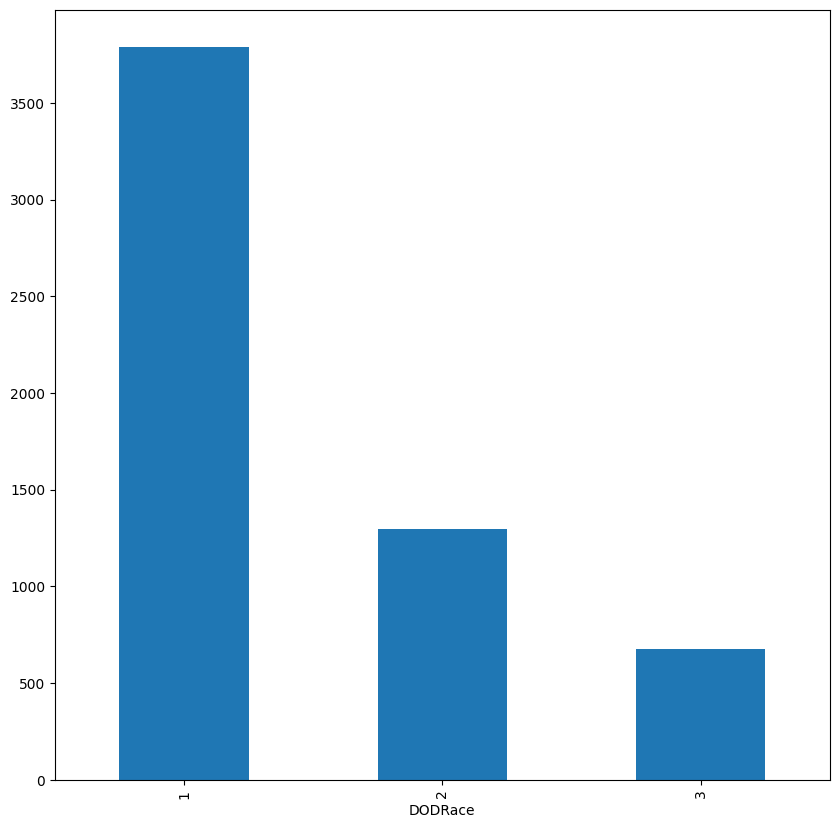

In [18]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="bar",figsize=(10,10));

In [19]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Heightin,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,1,1,71,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,1,1,68,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,2,2,68,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,1,1,66,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,2,2,77,Right hand


In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'WritingPreference'], dtype='object')


In [21]:
# Detect categorical columns by checking their data types
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Find unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_columns}

# Print the unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {len(values)}")

Unique values for column 'Gender': 2
Unique values for column 'WritingPreference': 3


In [22]:
df.sample(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Heightin,WritingPreference
393,314,1435,322,257,1306,263,196,414,375,289,522,79,328,310,144,1133,293,853,620,488,441,1505,298,1150,282,1269,808,637,358,39,74,24,278,823,101,278,338,309,617,473,1134,92,217,194,154,582,203,363,73,374,431,1021,650,427,445,474,541,472,78,462,125,392,429,1462,118,405,261,1210,353,151,934,890,570,1801,1744,1436,1094,704,202,799,451,126,871,1751,521,391,1149,294,434,996,1017,185,853,Male,1,1,69,Right hand
3182,263,1522,361,230,1406,260,205,442,387,306,528,76,340,325,144,1114,261,931,640,528,404,1599,299,1151,281,1387,898,697,381,39,65,21,236,821,103,273,370,323,562,499,1196,92,220,198,160,575,198,360,71,372,411,1123,680,384,407,522,587,531,79,407,120,386,422,1498,121,466,275,1218,388,152,952,939,631,1876,1840,1521,1191,656,196,884,494,133,942,1767,495,352,980,242,403,1123,955,181,902,Male,1,1,73,Right hand
1342,213,1533,356,227,1412,267,203,440,380,300,511,75,340,332,140,989,216,947,646,520,398,1604,301,1026,228,1361,908,613,370,34,66,24,243,873,107,281,369,323,547,503,1175,95,236,207,151,569,201,344,69,364,395,1119,650,385,423,510,581,519,77,393,126,390,434,1556,120,453,275,1187,394,162,985,917,620,1944,1872,1525,1183,569,175,846,492,135,961,1684,473,301,828,200,404,1131,841,178,901,Male,1,1,74,Right hand
443,214,1450,335,223,1339,254,200,415,325,263,484,73,310,275,140,941,222,856,599,491,358,1513,287,958,213,1291,824,649,390,35,66,26,248,822,101,272,332,282,533,458,1113,83,197,188,151,553,193,333,64,331,353,1053,640,426,448,475,543,472,79,374,113,368,415,1452,116,427,265,1135,370,153,935,870,594,1807,1750,1434,1090,567,166,833,467,123,888,1655,462,286,803,188,392,1059,690,169,842,Male,1,1,69,Right hand
4913,210,1286,305,190,1194,224,166,371,279,257,449,66,305,290,143,889,212,777,541,443,341,1348,244,906,248,1130,730,622,335,32,56,16,246,752,91,227,306,247,491,409,972,73,180,168,156,555,175,286,65,299,330,942,600,348,376,428,477,440,66,352,115,331,381,1261,98,361,223,1016,323,136,858,767,514,1577,1576,1285,1014,517,150,703,404,133,769,1520,428,263,762,183,345,932,548,149,763,Female,6,3,63,Right hand


In [23]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [24]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(gender_mapping)
df.Gender.value_counts()

Gender
0    3899
1    1870
Name: count, dtype: int64

In [25]:
writing_pref_mapping = {
    'Left hand': 1,
    'Right hand': 2,
    'Either hand (No preference)': 3
}
df['WritingPreference'] = df['WritingPreference'].map(writing_pref_mapping)
df.WritingPreference.value_counts()

WritingPreference
2    5088
1     622
3      59
Name: count, dtype: int64

In [26]:
df.sample(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,DODRace,Heightin,WritingPreference
4313,256,1315,308,209,1201,211,182,356,303,273,449,68,297,282,131,1002,206,851,572,469,369,1378,268,960,242,1151,789,552,312,32,58,22,182,713,84,240,308,270,523,427,1075,79,184,172,142,537,175,298,64,350,393,995,575,385,395,458,518,462,67,381,111,324,355,1280,104,396,241,1007,336,132,817,805,541,1652,1601,1313,1037,615,169,746,442,124,820,1514,414,346,989,236,358,961,653,147,770,1,1,White,64,2
5087,236,1355,308,242,1245,234,171,374,310,262,448,68,320,290,140,1002,216,832,600,498,377,1394,263,892,235,1188,783,600,341,34,57,22,240,754,91,229,318,275,466,425,1080,74,185,172,148,566,189,298,62,354,387,997,660,382,422,453,512,476,69,406,112,342,380,1281,104,395,239,1015,338,134,860,815,532,1620,1638,1329,1045,606,167,755,442,127,848,1517,416,302,877,209,346,972,670,161,824,1,1,White,66,2
5982,190,1321,306,194,1243,219,177,361,251,271,412,64,267,252,121,938,191,788,570,473,333,1365,247,841,216,1161,761,590,304,34,58,21,254,763,93,237,289,238,416,413,969,77,177,170,145,525,181,282,62,335,350,961,550,347,366,442,493,457,58,341,106,302,353,1237,104,394,227,970,327,148,866,767,531,1611,1613,1332,1031,540,149,665,425,122,801,1534,402,275,728,172,368,971,535,141,801,1,1,White,64,2
436,229,1440,338,218,1344,246,205,412,312,247,473,76,320,295,128,914,222,905,616,498,378,1533,263,968,234,1309,865,583,348,36,62,25,202,802,98,284,360,305,524,494,1149,90,218,197,144,545,193,343,72,319,332,1083,595,435,464,503,577,502,72,374,124,375,410,1457,122,463,274,1142,368,159,911,898,614,1865,1767,1453,1128,540,164,832,490,134,921,1563,466,269,769,196,367,1083,682,176,825,0,1,White,72,2
3335,281,1406,325,227,1304,248,195,399,384,286,505,71,306,291,141,1097,275,843,613,504,405,1485,276,1068,271,1268,817,649,339,35,62,18,280,777,93,255,324,321,594,453,1094,85,207,177,156,563,194,327,69,368,406,1025,580,424,430,473,541,476,71,434,114,407,444,1309,110,412,249,1153,335,123,886,852,565,1658,1697,1388,1107,686,192,738,448,131,866,1709,517,349,1052,289,371,1005,889,173,855,0,1,White,68,2


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
df.dropna(inplace=True)

In [29]:
X= df.drop("DODRace",axis=1)
y= df.DODRace

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,Heightin,WritingPreference
2482,224,1364,319,224,1261,246,191,405,357,245,503,76,328,297,141,1021,228,822,605,508,385,1432,275,1017,250,1244,831,593,332,36,61,25,230,757,100,255,325,300,581,459,1091,90,217,182,161,579,196,327,73,341,370,1013,620,408,432,461,527,466,67,395,123,380,410,1302,115,413,249,1159,337,141,859,844,565,1702,1666,1365,1070,633,184,745,442,129,836,1564,432,312,891,213,375,1014,787,174,801,0,3,65,2
3633,280,1490,346,240,1378,265,200,398,333,273,492,74,329,324,146,1046,258,902,635,518,399,1564,306,1053,254,1343,865,661,367,40,66,21,285,828,106,274,345,310,577,479,1165,91,218,196,158,578,202,342,75,362,380,1067,635,424,427,500,568,507,75,425,131,396,442,1393,115,447,267,1190,378,142,948,918,625,1807,1802,1485,1175,638,179,790,469,133,894,1732,494,339,991,262,410,1103,903,176,881,0,1,71,2
2210,259,1469,343,247,1376,271,214,444,360,286,516,79,330,315,145,1065,241,886,604,494,400,1553,296,1080,270,1317,870,642,339,35,64,23,240,848,108,289,358,320,567,504,1135,95,225,205,158,597,208,372,76,366,396,1100,610,402,448,507,582,513,83,433,134,427,460,1478,123,448,274,1220,372,162,968,940,603,1908,1820,1491,1140,637,180,885,485,144,901,1655,470,341,955,227,386,1094,922,194,860,0,1,72,3
4607,209,1432,299,246,1331,258,193,369,324,284,452,72,317,303,143,1076,240,874,612,492,424,1483,273,912,240,1229,827,691,380,35,59,19,251,804,98,260,321,286,499,439,1148,83,201,179,155,568,204,336,70,368,419,1072,645,398,420,466,552,481,77,437,124,326,370,1352,108,417,248,1050,335,139,918,815,532,1649,1741,1416,1129,655,187,737,458,134,889,1640,429,290,800,185,368,1061,776,169,896,1,1,69,2
5128,217,1331,324,218,1247,234,196,360,320,261,442,71,319,287,131,1026,225,854,606,506,389,1407,259,882,208,1172,813,642,341,34,60,17,213,730,93,258,321,286,511,457,1052,84,194,185,147,545,189,322,73,363,418,1012,625,340,365,452,528,485,65,455,100,326,361,1273,116,386,251,1032,345,142,843,818,556,1711,1648,1349,1065,656,181,746,442,130,857,1546,402,303,875,209,342,988,716,166,780,1,2,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [32]:
df.shape

(5769, 98)

In [33]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [38]:
logistic_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [39]:
y_pred = logistic_model.predict(X_test)

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[250  21  11]
 [  8  97  34]
 [ 17 125 591]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       282
    Hispanic       0.40      0.70      0.51       139
       White       0.93      0.81      0.86       733

    accuracy                           0.81      1154
   macro avg       0.75      0.80      0.76      1154
weighted avg       0.86      0.81      0.83      1154


Train_Set
[[ 918   74   24]
 [  45  391  104]
 [  62  514 2483]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90      1016
    Hispanic       0.40      0.72      0.51       540
       White       0.95      0.81      0.88      3059

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615



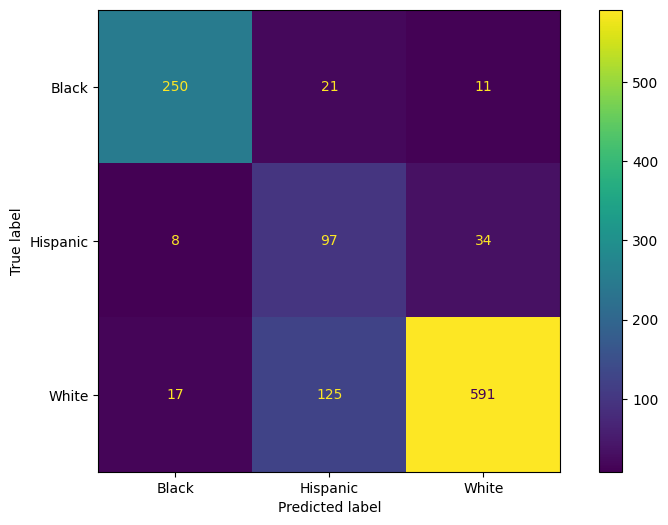

In [38]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test);

In [39]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(class_weight='balanced',max_iter=5000,random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.808
train_accuracy             0.821
test_precision_weighted    0.863
train_precision_weighted   0.874
test_recall_weighted       0.808
train_recall_weighted      0.821
test_f1_weighted           0.826
train_f1_weighted          0.838
dtype: float64

### Logistic Model GridsearchCV

In [40]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=10000))]

model = Pipeline(steps=operations)

In [41]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [42]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True)

In [43]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [44]:
grid_model.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l2'}

In [45]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.874
mean_train_score   0.887
Name: 3, dtype: object

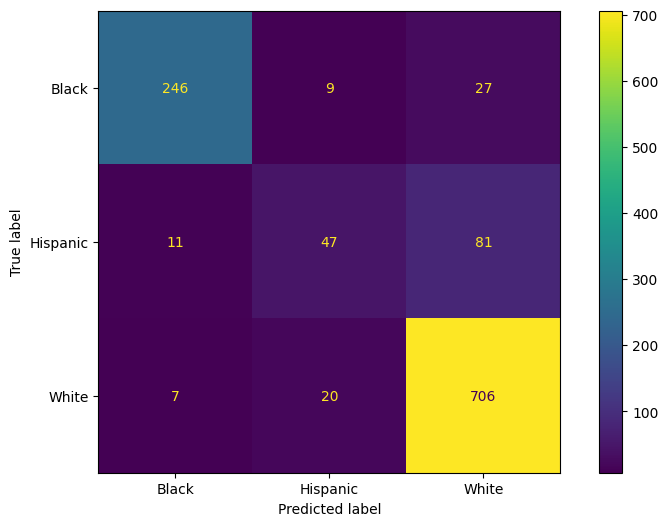

In [46]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [47]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[246   9  27]
 [ 11  47  81]
 [  7  20 706]]
              precision    recall  f1-score   support

       Black       0.93      0.87      0.90       282
    Hispanic       0.62      0.34      0.44       139
       White       0.87      0.96      0.91       733

    accuracy                           0.87      1154
   macro avg       0.81      0.72      0.75      1154
weighted avg       0.85      0.87      0.85      1154


Train_Set
[[ 929   20   67]
 [  51  203  286]
 [  35   69 2955]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91      1016
    Hispanic       0.70      0.38      0.49       540
       White       0.89      0.97      0.93      3059

    accuracy                           0.89      4615
   macro avg       0.83      0.75      0.78      4615
weighted avg       0.87      0.89      0.87      4615



## 2. SVC

### Vanilla SVC model

In [48]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

In [49]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[243   3  36]
 [ 12  28  99]
 [  6   5 722]]
              precision    recall  f1-score   support

       Black       0.93      0.86      0.90       282
    Hispanic       0.78      0.20      0.32       139
       White       0.84      0.98      0.91       733

    accuracy                           0.86      1154
   macro avg       0.85      0.68      0.71      1154
weighted avg       0.86      0.86      0.83      1154


Train_Set
[[ 946    8   62]
 [  52  135  353]
 [  17   12 3030]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1016
    Hispanic       0.87      0.25      0.39       540
       White       0.88      0.99      0.93      3059

    accuracy                           0.89      4615
   macro avg       0.89      0.72      0.75      4615
weighted avg       0.89      0.89      0.87      4615



In [51]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.864
train_accuracy             0.882
test_precision_weighted    0.857
train_precision_weighted   0.885
test_recall_weighted       0.864
train_recall_weighted      0.882
test_f1_weighted           0.831
train_f1_weighted          0.854
dtype: float64

###  SVC Model GridsearchCV

In [52]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [53]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True)

In [54]:
grid_model = GridSearchCV(svm_model_grid, param_grid = param_grid, cv=5, return_train_score=True)

In [55]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [56]:
svm_model_grid.best_params_

{'SVC__C': 0.001,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

In [57]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.001, class_weight='balanced', probability=True))])

In [71]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     NaN
mean_train_score    NaN
Name: 0, dtype: object

In [59]:
y_pred = svm_model_grid.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

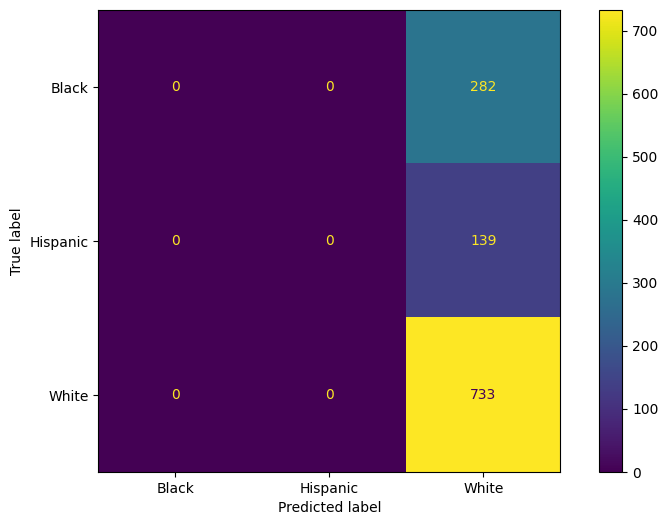

In [60]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

In [61]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0 282]
 [  0   0 139]
 [  0   0 733]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00       282
    Hispanic       0.00      0.00      0.00       139
       White       0.64      1.00      0.78       733

    accuracy                           0.64      1154
   macro avg       0.21      0.33      0.26      1154
weighted avg       0.40      0.64      0.49      1154


Train_Set
[[   0    0 1016]
 [   0    0  540]
 [   0    0 3059]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00      1016
    Hispanic       0.00      0.00      0.00       540
       White       0.66      1.00      0.80      3059

    accuracy                           0.66      4615
   macro avg       0.22      0.33      0.27      4615
weighted avg       0.44      0.66      0.53      4615



## 3. RF

### Vanilla RF Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred = rf_model.predict(X_test)

In [64]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[271   5   6]
 [ 30  95  14]
 [  6  10 717]]
              precision    recall  f1-score   support

       Black       0.88      0.96      0.92       282
    Hispanic       0.86      0.68      0.76       139
       White       0.97      0.98      0.98       733

    accuracy                           0.94      1154
   macro avg       0.91      0.87      0.89      1154
weighted avg       0.94      0.94      0.94      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1016
    Hispanic       1.00      1.00      1.00       540
       White       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



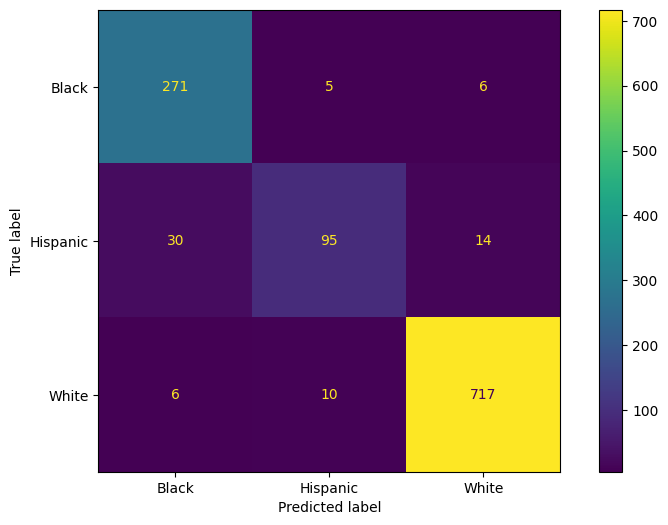

In [65]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test);

### RF Model GridsearchCV

In [66]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

In [67]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [68]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

In [69]:
# Evaluate the best model on the test data
y_pred = best_rf_classifier.predict(X_test)

In [70]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[268   5   9]
 [ 25  87  27]
 [  1   9 723]]
              precision    recall  f1-score   support

       Black       0.91      0.95      0.93       282
    Hispanic       0.86      0.63      0.72       139
       White       0.95      0.99      0.97       733

    accuracy                           0.93      1154
   macro avg       0.91      0.85      0.87      1154
weighted avg       0.93      0.93      0.93      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1016
    Hispanic       1.00      1.00      1.00       540
       White       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb.__version__
# !pip install xgboost==1.7.3


'1.7.3'

In [50]:
xgb = XGBClassifier()
operations_xgb = [
    
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
#XGBoost only accept numerical values
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [51]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)
#This is the highest score model

Test_Set
[[275   2   5]
 [  6 127   6]
 [  5  10 718]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       282
           1       0.91      0.91      0.91       139
           2       0.98      0.98      0.98       733

    accuracy                           0.97      1154
   macro avg       0.95      0.96      0.95      1154
weighted avg       0.97      0.97      0.97      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [52]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [54]:
operations_xgb = [
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [55]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)

In [56]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constra...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [57]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [58]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.03,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [59]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.998
mean_train_score   0.998
Name: 0, dtype: object

In [60]:
xgb_grid_model.best_score_

0.9981481481481481

In [61]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[234  46   2]
 [  0 137   2]
 [  0  42 691]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       282
           1       0.61      0.99      0.75       139
           2       0.99      0.94      0.97       733

    accuracy                           0.92      1154
   macro avg       0.87      0.92      0.88      1154
weighted avg       0.95      0.92      0.93      1154


Train_Set
[[ 791  225    0]
 [   0  539    1]
 [   0  196 2863]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1016
           1       0.56      1.00      0.72       540
           2       1.00      0.94      0.97      3059

    accuracy                           0.91      4615
   macro avg       0.85      0.90      0.85      4615
weighted avg       0.95      0.91      0.92      4615



---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [63]:
xgb = XGBClassifier()
operations_xgb_final = [ 
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb_final)
#XGBoost only accept numerical values
y_xgb = y.map({"Black": 0, "Hispanic": 1, "White": 2})


In [78]:
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb.head()
#turend the data to numerical because XGBoost doesnt accept categorical values

2128    2
4798    2
3107    2
5008    2
5120    0
Name: DODRace, dtype: int64

In [66]:
pipe_model_xgb.fit(X, y_xgb)

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [84]:
male_mean_human = X[X.Gender == 0].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
                                   ...   
wristheight                       848.762
Gender                              0.000
SubjectNumericRace                  8.017
Heightin                           70.122
WritingPreference                   1.895
Name: mean, Length: 97, dtype: float64

In [85]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectNumericRace,Heightin,WritingPreference
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,510.928,74.844,331.656,315.718,142.435,1021.294,246.362,889.500,619.217,504.001,392.427,1519.422,289.787,1060.497,254.390,1293.040,847.638,623.143,356.355,36.095,64.171,23.110,244.824,804.885,101.894,271.574,349.573,310.528,580.702,480.929,1132.126,88.380,212.571,193.509,154.184,574.708,199.761,344.002,72.565,346.257,379.948,1063.413,639.949,431.394,450.629,489.367,555.225,492.626,73.062,409.671,122.685,398.192,435.160,1428.469,116.610,430.685,268.314,1179.903,364.306,149.832,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,0.000,8.017,70.122,1.895


In [87]:
pipe_model_xgb.predict(pd.DataFrame(male_mean_human).T)
#The model predicted a 0 value (Black)

array([0], dtype=int64)

In [77]:
from sklearn.metrics import matthews_corrcoef

y_pred = pipe_model_xgb.predict(X_test)

matthews_corrcoef(y_test_xgb, y_pred)

0.0

In [83]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test_xgb, y_pred)

0.0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___